# ANCHORMEN ACADEMY
# LESSON 1

The common principle that underlies all supervised machine learning algorithms can be explained as follows: 

### Learning a function
Machine learning algorithms aim to **learn a target function $f$** that best maps input variables ($X$) to an output variable ($Y$):


$$ Y = f(X) $$

What function $f$ exaclty is or how it looks, is not known. And exaclty that (what the function $f$ has to be) is the part that Machine Learning tries to learn from the data.


### Making predictions

The main goal of machine learning is to learn the underlying function in order to **make predictions** of $Y$ for new $X$ (unseen data). When we *train* or *learn* a machine learning model we are *estimating* the target function (the target function is the best mapping from $Y$ given $X$ from the data that is available). Usually a lot of time is spent trying to improve this estimate of the unknown target function in order to improve performance of the predictions made by the model. 


### Different Learning Techniques

Each Machine Learning algorithm makes its own **assumptions about the shape and structure of the target function** and how to best optimize a representation to approximate it. As we mostly don't know anything about the target function, and so do not know beforehand which approach will make the best estimation of the target function it is important to investigate different machine learning algorithms in order to find out what works best. 

## SECTION A

For this example we will use the Iris data set. This is a widely used dataset in tutorials and contains measurements of flower sizes of 3 different species of Iris flowers. Our **goal is to classify each flower to the species it belongs to** (the `label`), based on these measurements.

In [1]:
# loading libraries, some settings for plots

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 8]
sns.__version__ #should be >= 0.11

'0.11.0'

In [2]:
df = sns.load_dataset("iris")
# What does the data look like?
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


The complete dataset contains 150 `samples`, corresponding to 150 flowers. The `properties` of these flowers are called `features`. The `features` refer to the $X$ variables, also known as independent variables, dimensions or attributes. The $y$ variable, the label is denoted as the `target` (also known as dependent variable). 

To take a further look at the data and inspect it we will first **visualize** it. From the plot below we can see that the three classes can be separated relatively well. 

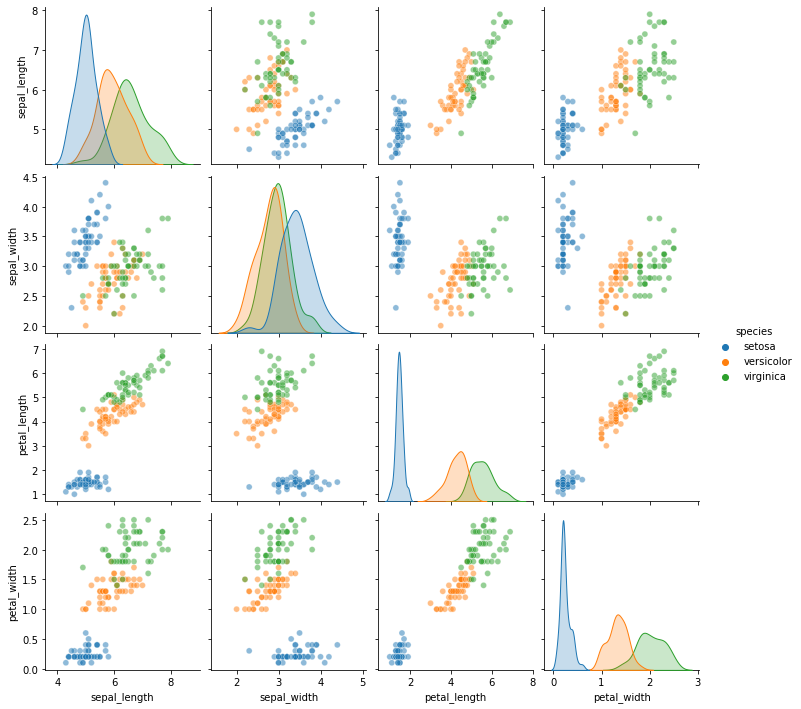

In [3]:
# How is the data distributed?
# What do you see? What does this mean?
sns.pairplot(df, hue="species", plot_kws={'alpha':0.5 });

Depending on your dataset, you might want to explore the data in different ways. Exploring the data comes down to a three step process:

1. Ask yourself a question about the data. E.g., is there a relation between variable $x_1$ and $x_2$? How is the distibution of variable $x_3$? What are outliers? 
2. Try to answer this question roughly by visualising the data or looking at statistics.
3. Return to 1, unless there are no questions left.

In the case of the Iris dataset, the data is not that complex. But you will have to get creative in most cases, because there are lots of observations and simply shaking a `pairplot` out of you magic datascientist sleeve wont do the trick. More often than not, the data is too complex and polluted to simply start with a pairplot.

### Section B 
### Splitting data into train and test sets

Our goal is to predict the species of iris for a new data set of measurements. In order to `evaluate` the model and to indicate whether it generalizes well we can show the model new data for which we have the labels. Usually this is done by splitting the labeled collected data into a `training set` and a `test set`. So the **`training set` is used to train the machine learning model** and the **`test set` will be used later to assess how well the model works**. This is one of the this we do to prevent ourselves against overfitting. 

For some reason it is really tempting for starting datascientists to use very complex models. Maybe they just want to try out the cool stuff they have learned. One of the lessons I have learned early on in my career is that you should start with the simplest model possible, and take that as a baseline. Then gradually start to make the model more complex.

#### Scikit-learn
Scikit-learn consistently expects a separate $X$ matrix and $y$ vector (Note that the capitalized $X$ notation and lowercase $y$ notation are common to denote a matrix (the capital letters) and a vector (the lowercase).

Let's split out the $X$ and the $y$, and then split them again into a training set and a test set.

In [4]:
# Load libraries
from sklearn.model_selection import train_test_split

# Separate dataset into features X and labels y
X = df.drop(['species'], axis=1)
y = df['species']

# normalize the data. In the Iris dataset, it won't make that much difference. (Why not?)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, index = df.index) # we loose the index in the scaler, so we put it back. This is easy for plotting later on.

# Split data into train/validation set and test set 
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=44)

# Split the train/validation data into train and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(X_trainval, y_trainval, random_state=1)

# Display size of each set
print ("Training set size:   ", len(X_train))
print ("Validation set size: ", len(X_validation))
print ("Test set size:       ", len(X_test))

Training set size:    84
Validation set size:  28
Test set size:        38


## SECTION C
### Exploring the data some more

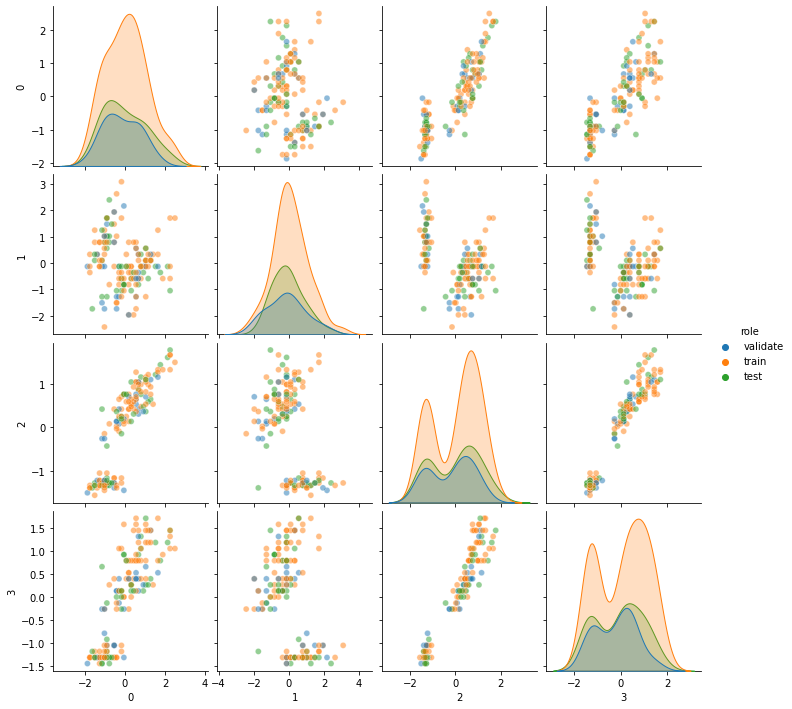

In [5]:
# Add a column to the original dataset denoting 'train' or 'test' role (only for plotting purposes below)
X.loc[X_train.index, 'role'] = 'train'
X.loc[X_test.index, 'role'] = 'test'
X.loc[X_validation.index, 'role'] = 'validate'

# Plot to check how the data is distributed regarding train and test sets
# What do you see? What does this mean?
# how is this different from the pairplot you saw before?
sns.pairplot(X, hue='role',  plot_kws={'alpha': 0.5});

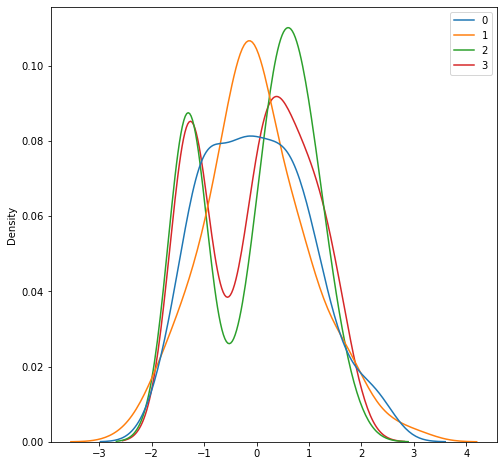

In [6]:
# Pairplots can be slow. This can be more straighforward, sometimes. Maybe a bit crowded.
# what does this show you? How is this different from the plots above? Especially from the diagonal kde-plots in the pairplot?
sns.kdeplot(data=X);

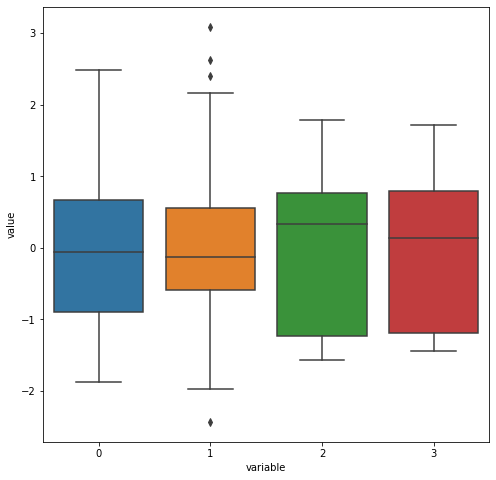

In [7]:
# or, what could be clearer in some cases:
p = X.drop('role', axis=1).melt()
sns.boxplot(x='variable', y = 'value', data=p);

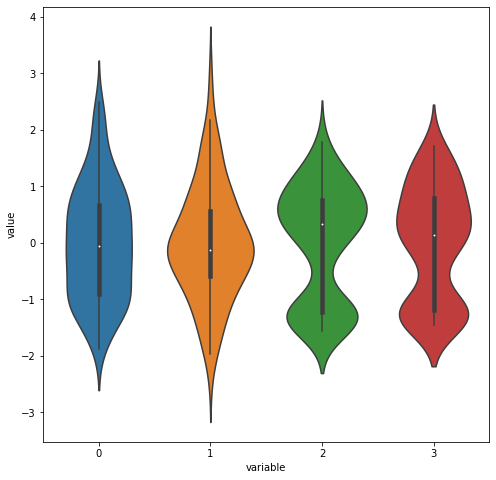

In [8]:
# or maybe even:
sns.violinplot(x='variable', y = 'value', data=p);

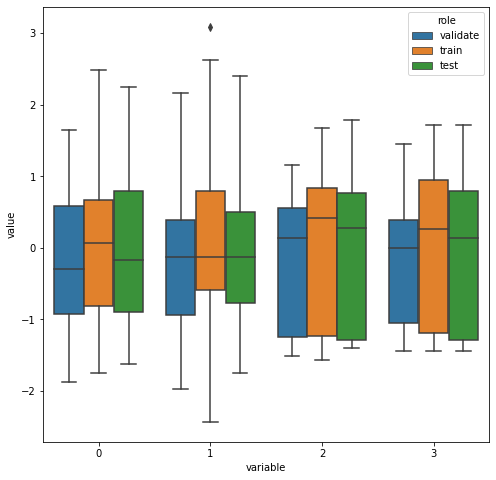

In [9]:
# another way, to preserve the role, could be:
p = X.melt(id_vars = 'role')
sns.boxplot(x='variable', y = 'value', hue = 'role', data=p);

These are just a few examples. As said before, this process depends on the complexity of your data and will usually be a circular process of hypothesizing and trying to answer these question.

## SECTION D 
### Grid Search with Cross-Validation



### Information Leaks

It's important to create an additional validation set next to the training and test set. When you are applying machine learning methods in practice choices made on the test set accuracy "leak" information from the test set into the model. 

Imagine your announcement to your datascience team that you made an absolutely fantastic model with 98% accuracy, only to find out later on that you overfitted and your model performs really poor on new data. That's something you want to avoid, I assume.

As you never want to leak any information to have a good generalization perspective it is important to always **keep an isolated validation set**, so the final evaluation of the model is completely independent.

### Manual Grid Search Workflow

In the code cell below you can see the overall workflow of running a grid search, and evaluating the final parameter for the example case we described above. What these parameters ($C$ and gamma ($\gamma$) is beyond the topic of this lesson and should be explained in a lesson that deals with SVM's.

In [10]:
from sklearn.svm import SVC
# Grid search over parameter grid, to find best parameters
best_score = 0 
# note that there are even more parameters for a SVC that we could play with. See sklearn documentation for more details.
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:

        # Initialize SVC model for given combination of parameters
        svm = SVC(gamma=gamma, C=C)

        # Train on train set
        svm.fit(X_train, y_train)
    
        # Evaluate on test set 
        score = svm.score(X_validation, y_validation)

        # Store the best score 
        if score > best_score: 
            best_score = score 
            best_parameters = {'C': C, 'gamma': gamma}


# Initiatize model with best parameters
# Note that '**' (dereference operator) is used to convert the dict into parameters
svm = SVC(**best_parameters)

# Train on train/validation set
svm.fit(X_trainval, y_trainval)

# Score on test set
test_score = svm.score(X_test, y_test)

# Print scores
print("Best score on validation set:         {:.2f}".format(best_score))
print("Best parameters:                     ", best_parameters)
print("Test set score with best parameters:  {:.2f}".format(test_score))

Best score on validation set:         0.89
Best parameters:                      {'C': 100, 'gamma': 0.001}
Test set score with best parameters:  0.95


While this works, scikit-learn has automated this for you. This is not just less work, it also guards you against errors. So. let's have a look at a more automated and robust version with **GridSearchCV**.

Although splitting the data into a training, validation and test set is workable, this approach can be sensitive to how exactly the data is split. For better generalization performance, cross-validation is a more sophisticated method to evaluate the performance of each parameter.

In [11]:
# Split original data into train and test
X.drop('role', axis=1, inplace=True) # remove extra column we added
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Scikit-learn provides the **`GridSearchCV`** class, which implements a gridsearch with cross-validation in the form of an estimator. Before instantiating the `GridSearchCV` class, we need to specify the parameters of interest using a dictionary. In this dictionary the keys refer to the parameters we want to adjust and the values are the parameter settings we are interested in. 

In [12]:
# Set parameter grid
param_grid = {'C': [10**x for x in range(-4,3)],
              'gamma': [10**x for x in range(-4,3)]}
param_grid

{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

With this, we can run a fully automatied Cross validation Grid Search:

In [13]:
# Import libraries
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Instantiate GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=3)

# Display GridSearchCV object
grid_search

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]})

In [14]:
# usefull for plotting the heatmap of the combination of the two parameters
def gridsearch_heatmap(gridresults, param_grid, vmin = None, vmax = None):
    idx, col = ['param_' + [*param_grid.keys()][i] for i in range(2)] 
    #idx, col = ['param_' + key for key in param_grid.keys()] 
    pivoted = pd.pivot_table(pd.DataFrame(gridresults.cv_results_),
                            values = 'mean_test_score',
                            index = idx,
                            columns = col)
    pivoted.columns = ["{:.4f}".format(x) for x in pivoted.columns]
    #annot = pivoted.round(4)
    sns.heatmap(pivoted, vmin = vmin, vmax = vmax, annot = True)

`GridSearchCV` will perform all necessary model fits automatically. Moreover it will run cross validation for each combination of parameters that we specified and fit a new model on the whole training dataset with the best parameters that were found during the cross validation process.

In [15]:
# Do a Grid Search and automatically fit using best parameters
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]})

In [16]:
# Print best parameters and corresponding score
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:  {}".format(best_parameters))
print("Best score:       {:.2f}".format(best_score))

Best parameters:  {'C': 10, 'gamma': 0.1}
Best score:       0.96


But wait, let's visualize what we did:

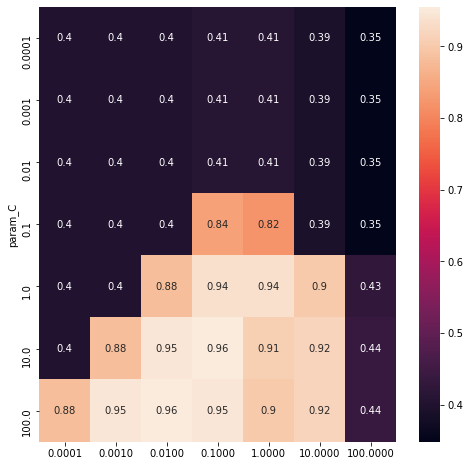

In [17]:
gridsearch_heatmap(grid_search, param_grid)

Usually, it is usefull to iterate this process. So let's wrap this in a function, and repeat this while zooming in on the heatmap. The process is this:

1. Make sure that your first gridsearch is large enough to have 'low performance' in the borders.
2. Zoom in on the hotspot, tuning up the gradient of the parameters. Make sure you dont overdo: 25 values for C and 25 values for gamma results in 25x25 combinations. This can take quite some time if you overdo this (eg a grid with 100 values of $C$ and 100 values of $\gamma$ results in 10.000 times fitting the SVC.)

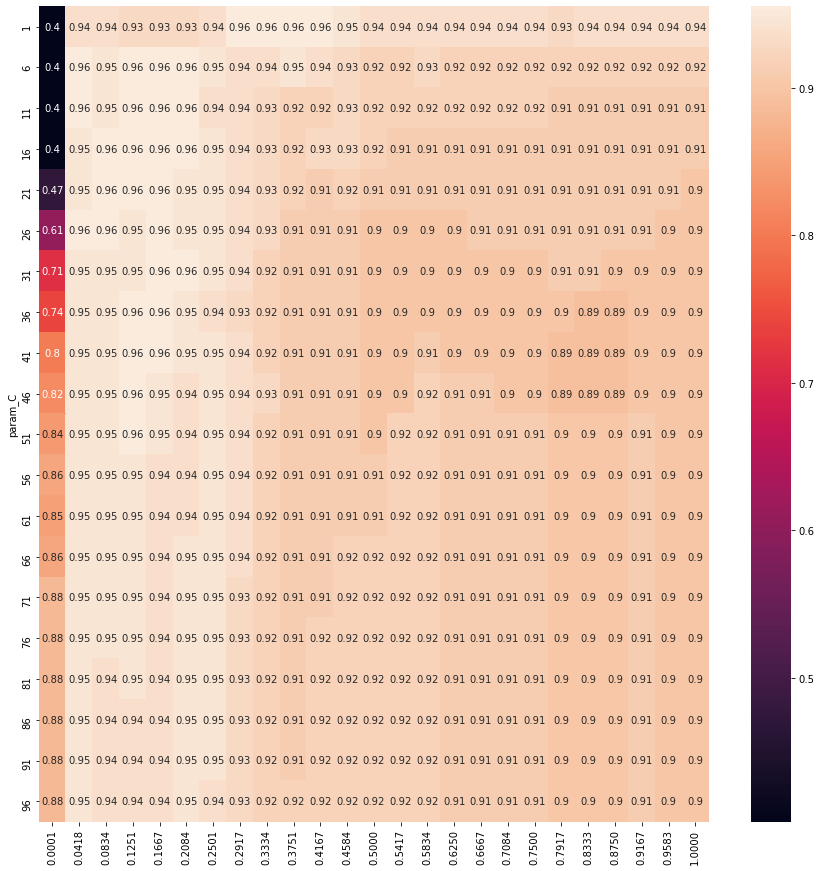

In [18]:
# Set parameter grid
# zoom in on what looks like a usefull are for C and gamma
param_grid = {'C': [i for i in range(1, 100, 5)],
              'gamma': [i for i in np.linspace(1e-4, 1, 25)]}

# function to automate this process:
def search_and_plot(X_train, y_train, param_grid, vmin=None):
    grid_search = GridSearchCV(SVC(), param_grid, cv=3)
    grid_search.fit(X_train, y_train)
    gridsearch_heatmap(grid_search, param_grid, vmin=vmin)
    return grid_search

plt.rcParams['figure.figsize'] = [15, 15]
grid_search = search_and_plot(X_train, y_train, param_grid)

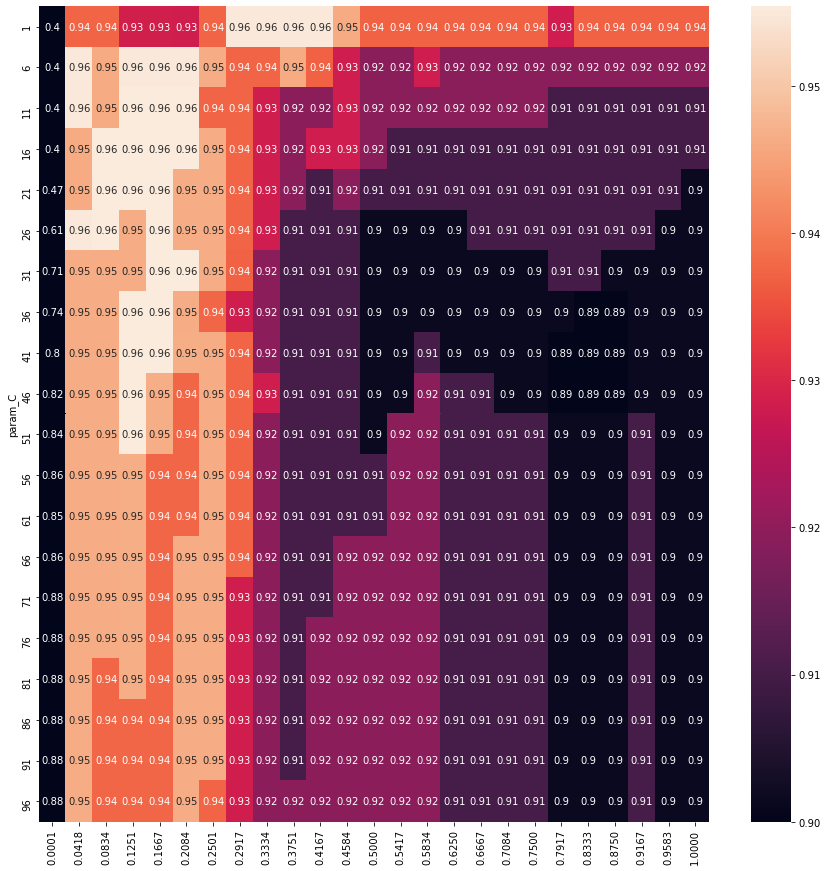

In [19]:
# often it is usefull to fiddle with the colors to increase the contrast.
gridsearch_heatmap(grid_search, param_grid, vmin = 0.9)

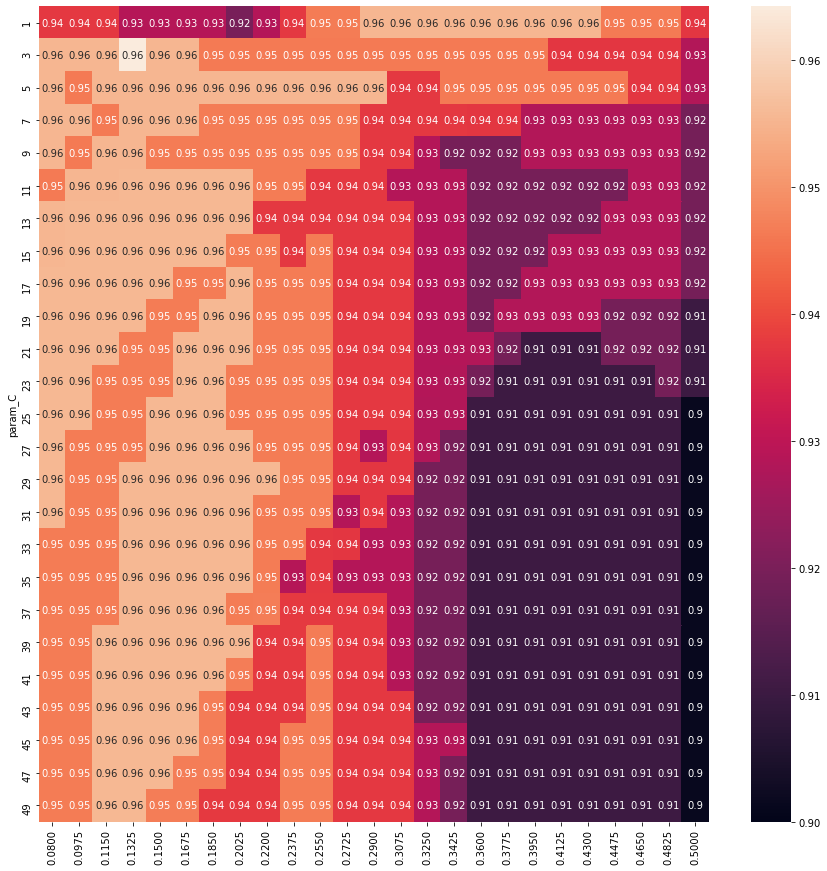

In [20]:
# zoom in again
param_grid = {'C': [i for i in range(1, 50, 2)],
              'gamma': [i for i in np.linspace(0.08, 0.5, 25)]}
grid_search = search_and_plot(X_train, y_train, param_grid, vmin = 0.9)

In [21]:
# Print best parameters and corresponding score
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:  {}".format(best_parameters))
print("Best score:       {:.2f}".format(best_score))

Best parameters:  {'C': 3, 'gamma': 0.1325}
Best score:       0.96


A question that is not straightforward to answer, is: are the 'best parameters' returned by the grid search, actually the best parameters?

Look at the heatmap; you can see the whit spot in the left upper corner, which is the value that is returned as (0.1325, 3).

As you see, going just a bit higher, lets say to (0.1325, 1), will drop your performance with 2 percents.
A value somewhere in the area with $C = [11,23]$ seems to have a stable performance of about .955, at least for the region $\gamma = [0.08, 0.185]$. Picking the middle of this "Island of performance" might be a more stable setting when it comes to unseen data. If this is actually the case, depends on the datasets at hand. Without additional information, I would say that the area for $C = [11,23]$ is a safer guess for stable performance than picking $C = 3$.

# Adding pipelines
Another usefull feature is to create a pipeline of functions.

In [22]:
# let's start with the original, unscaled, dataset.
df = sns.load_dataset("iris")
X = df.drop(['species'], axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


from sklearn.pipeline import Pipeline
# Build pipeline
pipe = Pipeline(
    [
        ("scaler", StandardScaler()), # we add a scaler
        ("svm", SVC()) # and a model
    ]
)

Here, you see combined the scaler and the SVC. You can add more functions to that. A Pipeline takes a list of name-estimator pairs. All but the last one must be transformers (meaning, they must have a `fit_transform()` method).

Calling `fit()` on the pipe calls the `fit_transform()` methods sequentially, and `fit()` on the final method.

In [23]:
# note the double underscore in the parameter names. This refers to the name-estimator pairs in the pipeline.
param_grid = {'svm__C': [i for i in range(1, 50, 2)],
              'svm__gamma': [i for i in np.linspace(0.08, 0.5, 25)]}

gridsearch = GridSearchCV(pipe, param_grid=param_grid, cv=5)

# Fit GridSearchCV
gridsearch.fit(X_train, y_train)

# Print results (CV accuracy, test set score, best parameters)
print(gridsearch.best_score_)
print(gridsearch.score(X_test, y_test))
print(gridsearch.best_params_)

0.9640316205533598
1.0
{'svm__C': 1, 'svm__gamma': 0.20249999999999999}


In principle, this is exectly the same as what we did before. It just wraps more into a solid architecture, making sure that all steps in the datapreparation are executed in the right sequence.

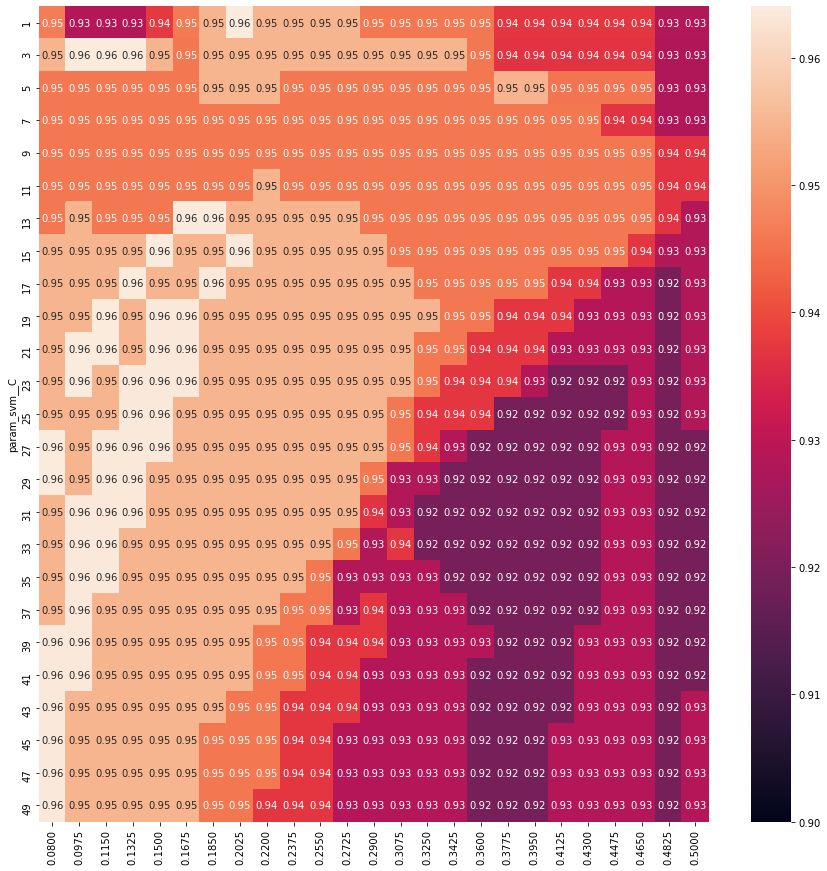

In [24]:
gridsearch_heatmap(gridsearch, param_grid, vmin=0.9)